<a href="https://colab.research.google.com/github/andrewrudnell/Lecture-Matter_-Cloud-Computing-with-R-and-Colabs/blob/main/Experimental_Design_Lecture_(Pak_Agung)_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experimental Design Lecture**
## Code: CS001SC001ED001M1
## Topic: Intorduction to R and Gogle Colab
### Author: Andrew Yoel Siallagan
### date: 15/03/2023

# **Abstract**

---

In this lesson, we will discuss how to use the R programming language to help us do data analysis, especially on data obtained from a series of experimental design analysis. This session also introduces the use of cloud computing methods using Google Colab as a code editor/notebook to write all the script code that we will execute to extracted the insight/information from our data.


# **Reference**

---


Video:
>
* https://www.youtube.com/watch?v=nykOeWgQcHMlist=PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA

Books:
>
*   https://www.statlearning.com/
*   https://eprints.ukh.ac.id/id/eprint/252/1/2017_Book_DesignAndAnalysisOfExperiments.pdf



In [ ]:
install.packages("lme4")
install.packages("afex")
install.packages("ggplot2")
install.packages("car")
install.packages("lsmeans")
install.packages("multcomp")
install.packages("lmerTest")
install.packages("qqplotr")
install.packages("lmerTest")
install.packages("multcompView")
install.packages ("agricolae")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘numDeriv’, ‘carData’, ‘abind’, ‘quantreg’, ‘plyr’, ‘pbkrtest’, ‘lmerTest’, ‘car’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’, ‘emmeans’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘TH.data’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-librar

In [ ]:
install.packages('multcompView')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
devtools::install_github("aloy/qqplotr")

openssl  (2.0.4 -> 2.0.5) [CRAN]
jsonlite (1.8.3 -> 1.8.4) [CRAN]
stringr  (1.4.1 -> 1.5.0) [CRAN]
httr     (1.4.4 -> 1.4.5) [CRAN]
isoband  (0.2.6 -> 0.2.7) [CRAN]
qqconf   (NA    -> 1.3.1) [CRAN]


Installing 6 packages: openssl, jsonlite, stringr, httr, isoband, qqconf

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘qqconf’ had non-zero exit status”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpU3Vpms/remotes1196955f866/aloy-qqplotr-00af302/DESCRIPTION’ ... OK
* preparing ‘qqplotr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘qqplotr_0.0.6.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpU3Vpms/file11955a5ca38/qqplotr_0.0.6.tar.gz’ had non-zero exit status”


In [ ]:
library("lme4")
library("ggplot2")
library("car")
library("lsmeans")
library("multcomp")
library("lmerTest")
library("dplyr")
require("qqplotr")
library("lmerTest")
library("afex")

Loading required package: qqplotr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘qqplotr’”
************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer




## 1. Completely Randomized Design (CRD)
> The simplest ANOVA design from the standpoint of assigning experimental units to treatments.
> #### **Assumptions:**
> 1. Independent observations
> 2. Normally distributed residuals
> 3. Equal variance for each population
> ### **Advantages:**
> * Simplicity
> * Avoids making dubious statistical assumptions.
> * Few violation of assumptions.
> * Statistical anaylsis is simple.
> ### **Disadvantages:**
> * Lack of accuracy or ineeficiency to precisily estimate treatment effects.
> #### Decision:
> If the between group variability is larger than the within group variability, reject null hypothesis.


> ### **Dataset**:
> An animal science study of vitamin supplementation randomly assigned to 5 heifers,to each of eight treatment groups.

In [ ]:
vitamin<-data.frame(
  Treatment=c(rep("A",5),rep("B",5),rep("C",5),rep("D",5),rep("E",5),rep("F",5),rep("G",5),rep("H(Control)",5)),
  Replicate=rep(1:5,8),
  Weight.gain.kg=c(4.5,5.2,6.2,3.9,4.9,
                   5.6,4.7,4.3,4.4,6.1,
                   6.4,6.7,6.8,6.1,6.9,
                   5.2,5.0,6.8,3.6,5.6,
                   4.0,4.9,4.3,4.8,4.2,
                   7.1,6.5,6.2,6.8,6.1,
                   6.1,4.9,4.2,3.9,6.8,
                   4.6,4.0,4.9,3.8,4.2)
        )

In [ ]:
vitamin

Treatment,Replicate,Weight.gain.kg
<chr>,<int>,<dbl>
A,1,4.5
A,2,5.2
A,3,6.2
A,4,3.9
A,5,4.9
B,1,5.6
B,2,4.7
B,3,4.3
B,4,4.4


In [ ]:
vitamin$Treatment<-as.factor(vitamin$Treatment)
vitamin$Replicate<-as.factor(vitamin$Replicate)

In [ ]:
## Lets check the data structure.
head(vitamin)

,Treatment,Replicate,Weight.gain.kg
,<fct>,<fct>,<dbl>
1,A,1,4.5
2,A,2,5.2
3,A,3,6.2
4,A,4,3.9
5,A,5,4.9
6,B,1,5.6


In [ ]:
## We can view the entire table in a new tab.
View(vitamin)

Treatment,Replicate,Weight.gain.kg
<fct>,<fct>,<dbl>
A,1,4.5
A,2,5.2
A,3,6.2
A,4,3.9
A,5,4.9
B,1,5.6
B,2,4.7
B,3,4.3
B,4,4.4


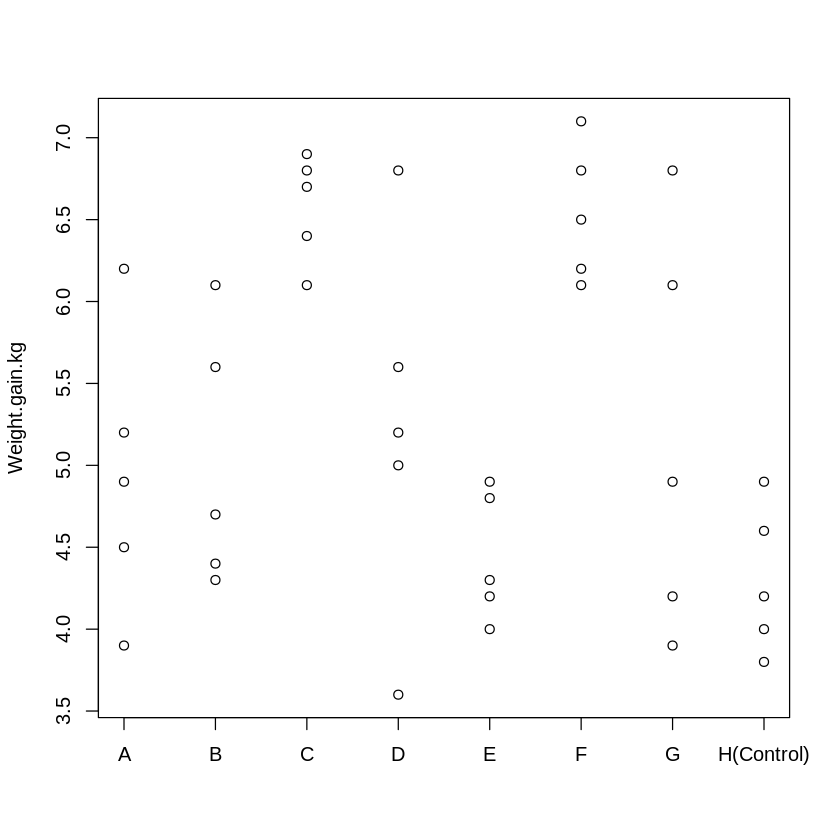

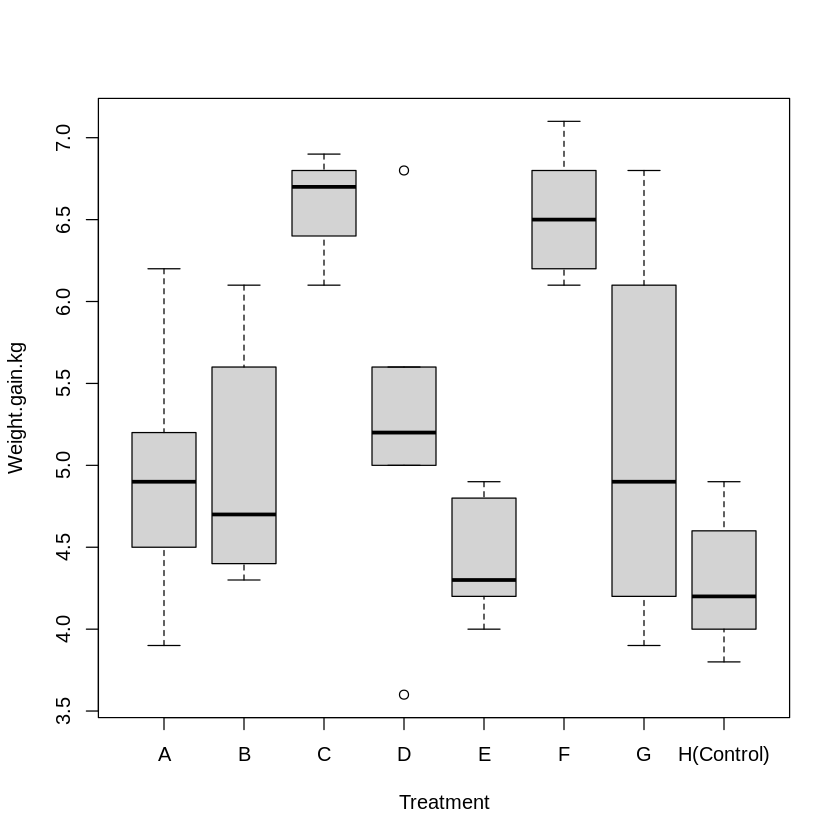

In [ ]:
## Lets make some figures to visualize our data.
stripchart(Weight.gain.kg~Treatment, vertical = TRUE, pch = 1, data = vitamin)
boxplot(Weight.gain.kg~Treatment, data = vitamin)

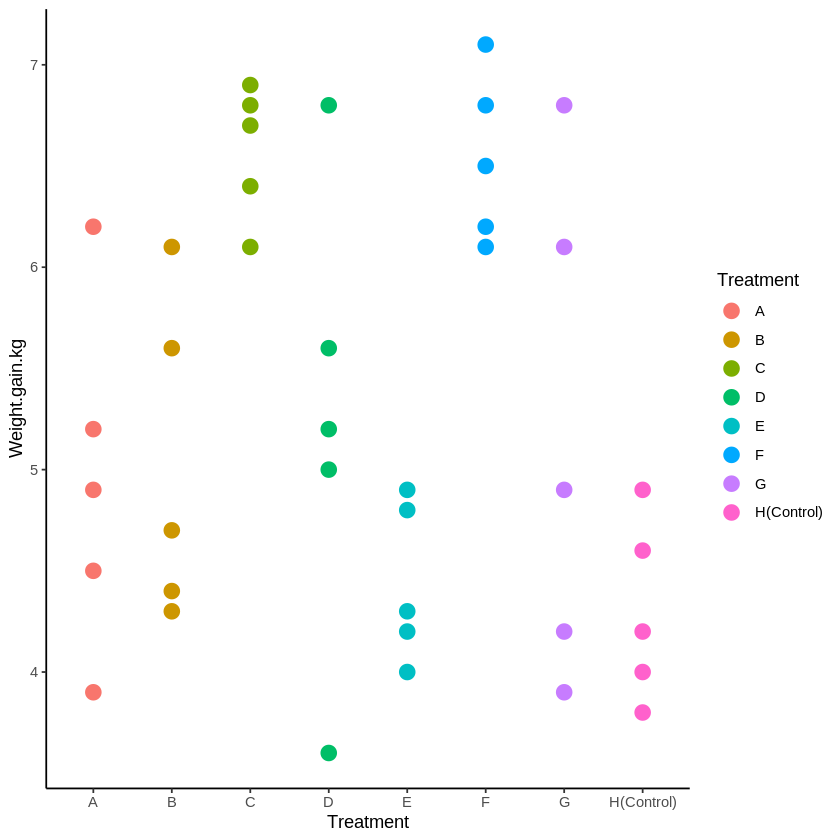

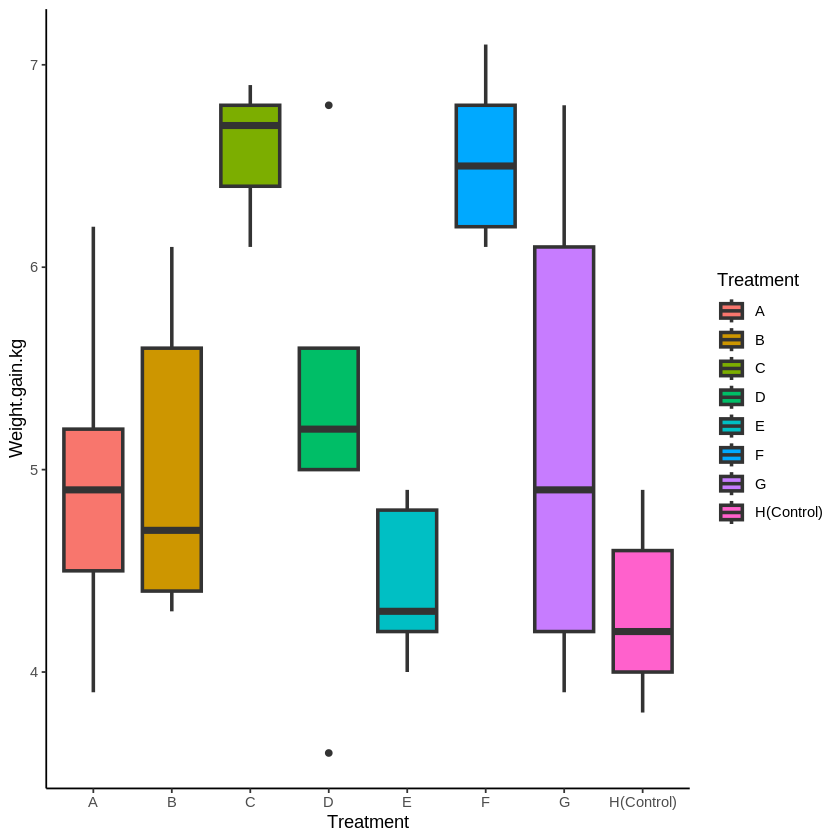

In [ ]:
ggplot(vitamin,aes(Treatment,Weight.gain.kg,color=Treatment))+geom_point(size=4)+theme_classic()
ggplot(vitamin,aes(Treatment,Weight.gain.kg,fill=Treatment))+geom_boxplot(size=1)+theme_classic()

In [ ]:
CRD<-aov(Weight.gain.kg~Treatment,data=vitamin)
summary(CRD)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment    7  25.69   3.670   6.044 0.000153 ***
Residuals   32  19.43   0.607                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

> The model indicates that significant differences exist between the treatments
> now need to check model assumption prior to presenting the model results.

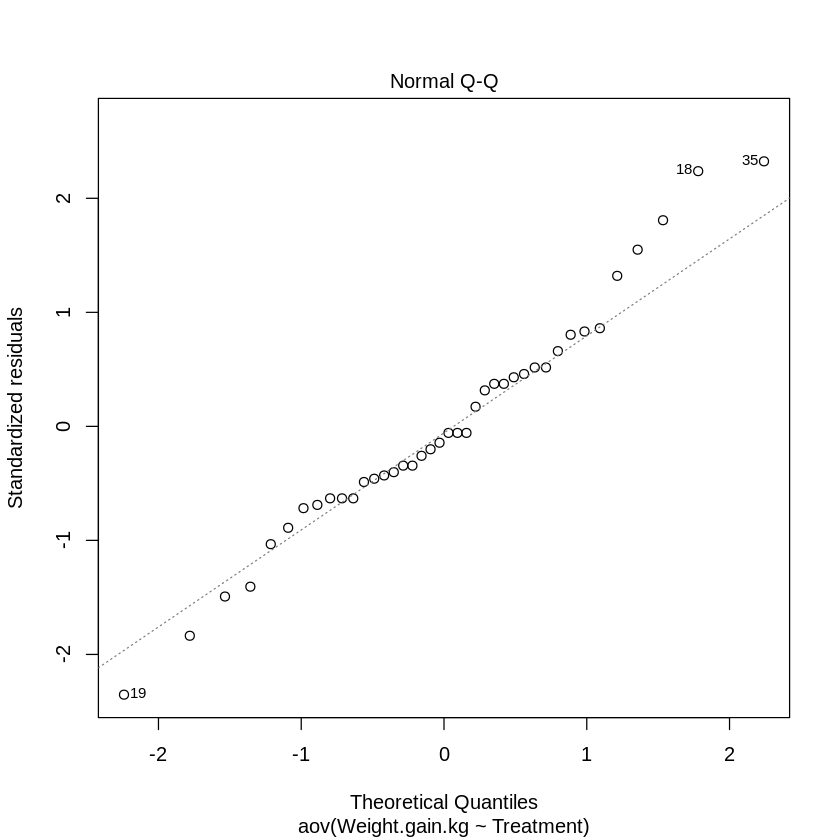

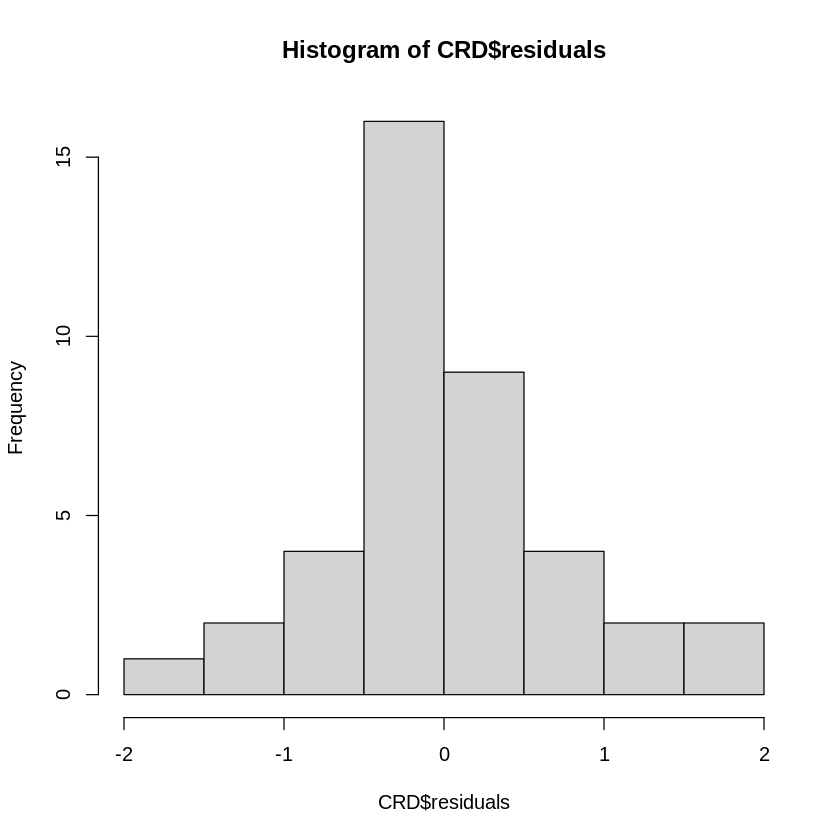

In [ ]:
## Normality
### QQ-plots are a great way to visualize normality
plot(CRD, which=2)
##Histograms can also be used to qualitatively access residual normality.
hist(CRD$residuals)

In [ ]:
## Shapiro-Wilk test normality test
### p-val < alpha : reject H~0~ that the residuals are normally distributed.
shapiro.test(CRD$residuals)


	Shapiro-Wilk normality test

data:  CRD$residuals
W = 0.97811, p-value = 0.6195


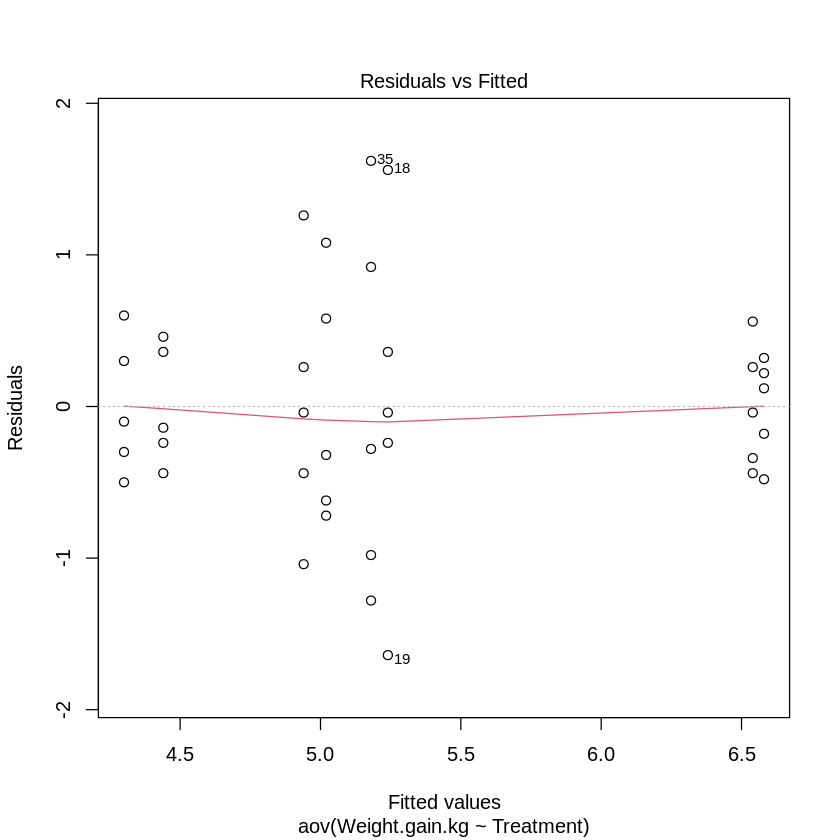

In [ ]:
## Unequal Variance Test
### Visually assess homogeneous variances between groups.
plot(CRD, which=1)

In [ ]:
## Levene's test
### Will provide a p-value to unequal variance testing.p-val < alpha : reject H~0~ that the variances are equal.
leveneTest(Weight.gain.kg~Treatment,data=vitamin)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,7,1.382296,0.2465622
,32,NA,NA


In [ ]:
### Least Squared Means Comparision
(LSD<-lsmeans(CRD, ~Treatment))

 Treatment  lsmean    SE df lower.CL upper.CL
 A            4.94 0.348 32     4.23     5.65
 B            5.02 0.348 32     4.31     5.73
 C            6.58 0.348 32     5.87     7.29
 D            5.24 0.348 32     4.53     5.95
 E            4.44 0.348 32     3.73     5.15
 F            6.54 0.348 32     5.83     7.25
 G            5.18 0.348 32     4.47     5.89
 H(Control)   4.30 0.348 32     3.59     5.01

Confidence level used: 0.95 

In [ ]:
## Now lets add the connecting letter report.
(LSM<-cld(LSD,Letters = LETTERS, decreasing=T))

,Treatment,lsmean,SE,df,lower.CL,upper.CL,.group
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8,H(Control),4.30,0.3484968,32,3.590135,5.009865,A
5,E,4.44,0.3484968,32,3.730135,5.149865,A
1,A,4.94,0.3484968,32,4.230135,5.649865,A
2,B,5.02,0.3484968,32,4.310135,5.729865,AB
7,G,5.18,0.3484968,32,4.470135,5.889865,AB
4,D,5.24,0.3484968,32,4.530135,5.949865,AB
6,F,6.54,0.3484968,32,5.830135,7.249865,B
3,C,6.58,0.3484968,32,5.870135,7.289865,B


In [ ]:
##Reordering factors to make the graph below more visually appealing.
LSM$Treatment<-factor(LSM$Treatment,levels(LSM$Treatment)[c(8,5,1,2,7,4,6,3)])

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


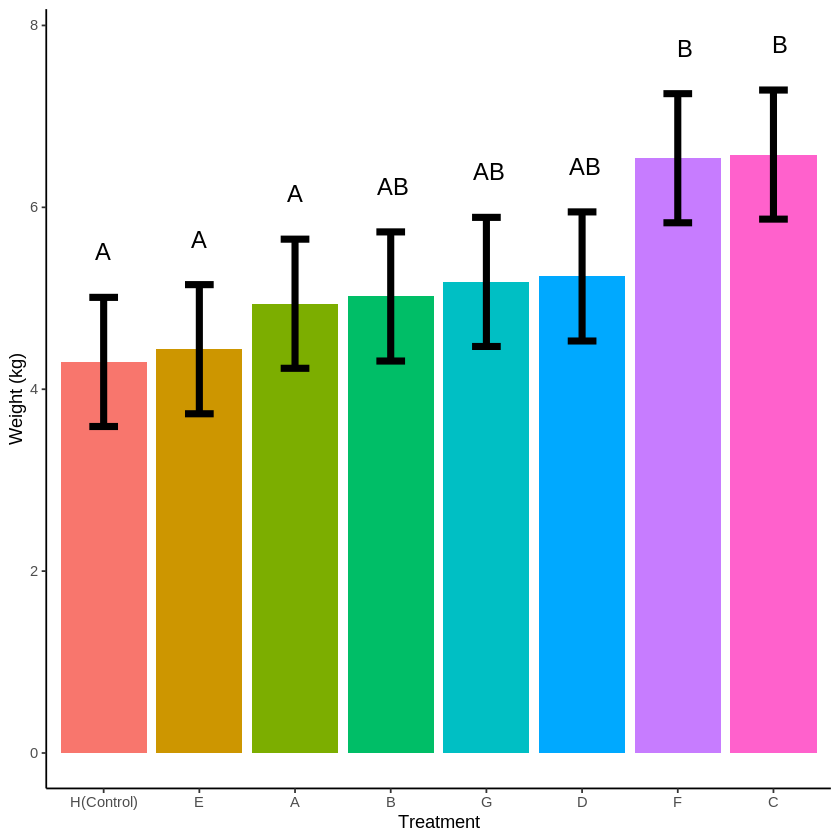

In [ ]:
## Creating LSMeans bar plots with confidence intervals and significant differences indicated by connecting leters
ggplot(LSM,aes(Treatment,lsmean, fill=Treatment))+
  geom_bar(stat="identity")+
  geom_errorbar(aes(ymin=lower.CL,ymax=upper.CL),width=.3,size=2)+
  geom_text(aes(label=.group,x=c(1:8),y=upper.CL+.5),size=5)+
  ylab("Weight (kg)")+
  theme_classic()+
  theme(legend.position = "none")

In [ ]:
install

In [ ]:
stackloss

Air.Flow,Water.Temp,Acid.Conc.,stack.loss
<dbl>,<dbl>,<dbl>,<dbl>
80,27,89,42
80,27,88,37
75,25,90,37
62,24,87,28
62,22,87,18
62,23,87,18
62,24,93,19
62,24,93,20
58,23,87,15
